# COVID-19 Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [49]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import seaborn as sns
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [3]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


#### Check the shape of the dataframes

In [7]:
confirmed_df.shape

(269, 301)

In [8]:
recoveries_df.shape

(256, 301)

In [9]:
deaths_df.shape

(269, 301)

### Delete the useless columns

In [10]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
1,Albania,0,0,0,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
2,Algeria,0,0,0,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
3,Andorra,0,0,0,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
4,Angola,0,0,0,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [11]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
1,Albania,0,0,0,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
2,Algeria,0,0,0,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
3,Andorra,0,0,0,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
4,Angola,0,0,0,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [12]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
1,Albania,0,0,0,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
2,Algeria,0,0,0,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,Angola,0,0,0,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


### Aggregate rows by Country

In [13]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
Albania,0,0,0,0,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
Algeria,0,0,0,0,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
Andorra,0,0,0,0,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
Angola,0,0,0,0,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [14]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
Albania,0,0,0,0,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
Algeria,0,0,0,0,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
Andorra,0,0,0,0,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
Angola,0,0,0,0,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [15]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
Albania,0,0,0,0,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
Algeria,0,0,0,0,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
Andorra,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
Angola,0,0,0,0,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


#### Check the shape of the new dataframes

In [16]:
confirmed_df_aggregated.shape

(191, 297)

In [17]:
recoveries_df_aggregated.shape

(191, 297)

In [18]:
deaths_df_aggregated.shape

(191, 297)

### Visualizing Europe confirmed cases

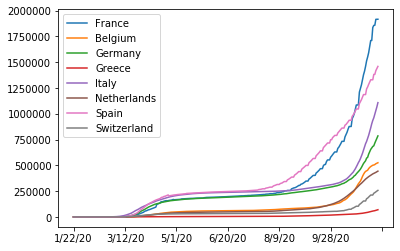

In [19]:
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/confirmed-europe.png")
plt.show()

### Visualizing Europe recoveries cases

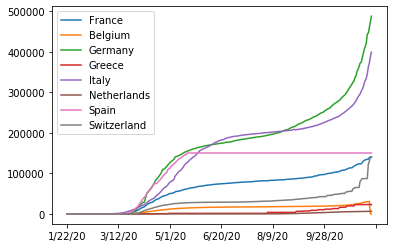

In [20]:
recoveries_df_aggregated.loc ["France"].plot()
recoveries_df_aggregated.loc ["Belgium"].plot()
recoveries_df_aggregated.loc ["Germany"].plot()
recoveries_df_aggregated.loc ["Greece"].plot()
recoveries_df_aggregated.loc ["Italy"].plot()
recoveries_df_aggregated.loc ["Netherlands"].plot()
recoveries_df_aggregated.loc ["Spain"].plot()
recoveries_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/recoveries-europe.png")
plt.show()

### Visualizing Europe deaths cases

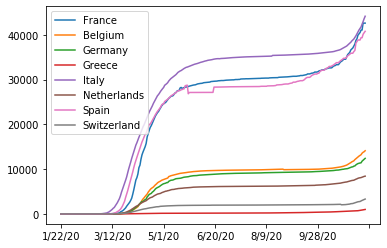

In [21]:
deaths_df_aggregated.loc ["France"].plot()
deaths_df_aggregated.loc ["Belgium"].plot()
deaths_df_aggregated.loc ["Germany"].plot()
deaths_df_aggregated.loc ["Greece"].plot()
deaths_df_aggregated.loc ["Italy"].plot()
deaths_df_aggregated.loc ["Netherlands"].plot()
deaths_df_aggregated.loc ["Spain"].plot()
deaths_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/deaths-europe.png")
plt.show()

### Visualizing Asia confirmed cases 

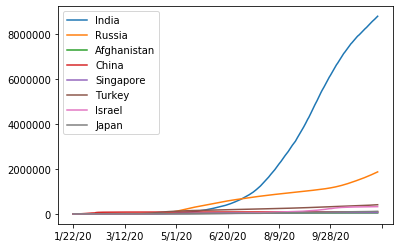

In [22]:
confirmed_df_aggregated.loc ["India"].plot()
confirmed_df_aggregated.loc ["Russia"].plot()
confirmed_df_aggregated.loc ["Afghanistan"].plot()
confirmed_df_aggregated.loc ["China"].plot()
confirmed_df_aggregated.loc ["Singapore"].plot()
confirmed_df_aggregated.loc ["Turkey"].plot()
confirmed_df_aggregated.loc ["Israel"].plot()
confirmed_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/confirmed-asia.png')
plt.show()

### Visualizing Asia recoveries cases

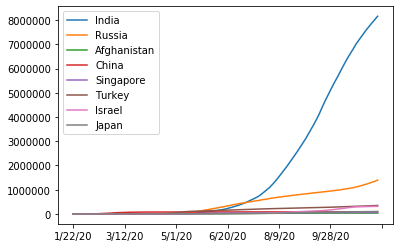

In [23]:
recoveries_df_aggregated.loc ["India"].plot()
recoveries_df_aggregated.loc ["Russia"].plot()
recoveries_df_aggregated.loc ["Afghanistan"].plot()
recoveries_df_aggregated.loc ["China"].plot()
recoveries_df_aggregated.loc ["Singapore"].plot()
recoveries_df_aggregated.loc ["Turkey"].plot()
recoveries_df_aggregated.loc ["Israel"].plot()
recoveries_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/recoveries-asia.png')
plt.show()

### Visualizing Asia deaths cases

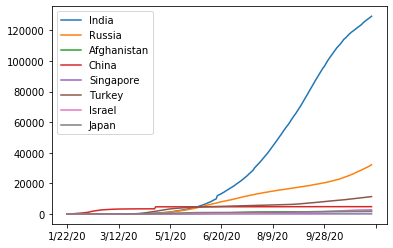

In [24]:
deaths_df_aggregated.loc ["India"].plot()
deaths_df_aggregated.loc ["Russia"].plot()
deaths_df_aggregated.loc ["Afghanistan"].plot()
deaths_df_aggregated.loc ["China"].plot()
deaths_df_aggregated.loc ["Singapore"].plot()
deaths_df_aggregated.loc ["Turkey"].plot()
deaths_df_aggregated.loc ["Israel"].plot()
deaths_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/deaths-asia.png')
plt.show()

### Visualizing Africa confirmed cases

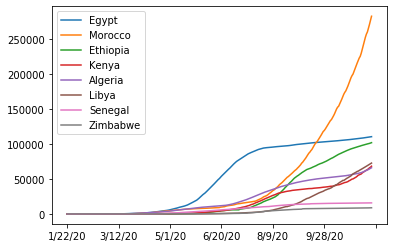

In [25]:
confirmed_df_aggregated.loc ["Egypt"].plot()
confirmed_df_aggregated.loc ["Morocco"].plot()
confirmed_df_aggregated.loc ["Ethiopia"].plot()
confirmed_df_aggregated.loc ["Kenya"].plot()
confirmed_df_aggregated.loc ["Algeria"].plot()
confirmed_df_aggregated.loc ["Libya"].plot()
confirmed_df_aggregated.loc ["Senegal"].plot()
confirmed_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/confirmed-africa.png')
plt.show()

### Visualizing  Africa recoveries cases

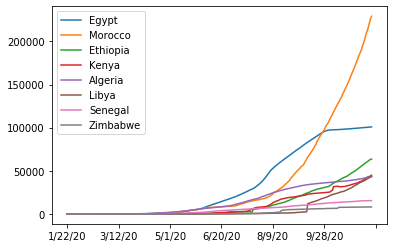

In [26]:
recoveries_df_aggregated.loc ["Egypt"].plot()
recoveries_df_aggregated.loc ["Morocco"].plot()
recoveries_df_aggregated.loc ["Ethiopia"].plot()
recoveries_df_aggregated.loc ["Kenya"].plot()
recoveries_df_aggregated.loc ["Algeria"].plot()
recoveries_df_aggregated.loc ["Libya"].plot()
recoveries_df_aggregated.loc ["Senegal"].plot()
recoveries_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/recoveries-africa.png')
plt.show()

### Visualizing Africa deaths cases

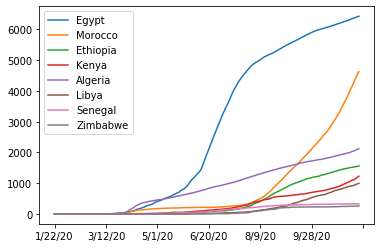

In [27]:
deaths_df_aggregated.loc ["Egypt"].plot()
deaths_df_aggregated.loc ["Morocco"].plot()
deaths_df_aggregated.loc ["Ethiopia"].plot()
deaths_df_aggregated.loc ["Kenya"].plot()
deaths_df_aggregated.loc ["Algeria"].plot()
deaths_df_aggregated.loc ["Libya"].plot()
deaths_df_aggregated.loc ["Senegal"].plot()
deaths_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/deaths-africa.png')
plt.show()

### Visualizing North America confirmed cases

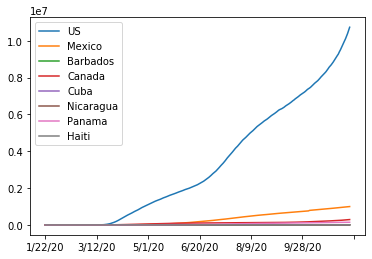

In [28]:
confirmed_df_aggregated.loc ["US"].plot()
confirmed_df_aggregated.loc ["Mexico"].plot()
confirmed_df_aggregated.loc ["Barbados"].plot()
confirmed_df_aggregated.loc ["Canada"].plot()
confirmed_df_aggregated.loc ["Cuba"].plot()
confirmed_df_aggregated.loc ["Nicaragua"].plot()
confirmed_df_aggregated.loc ["Panama"].plot()
confirmed_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/confirmed-northamerica.png')
plt.show()

### Visualizing North America recoveries cases

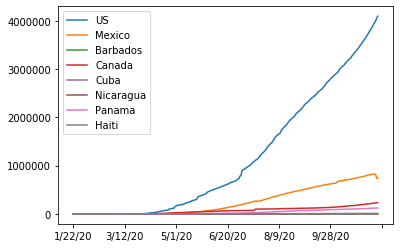

In [29]:
recoveries_df_aggregated.loc ["US"].plot()
recoveries_df_aggregated.loc ["Mexico"].plot()
recoveries_df_aggregated.loc ["Barbados"].plot()
recoveries_df_aggregated.loc ["Canada"].plot()
recoveries_df_aggregated.loc ["Cuba"].plot()
recoveries_df_aggregated.loc ["Nicaragua"].plot()
recoveries_df_aggregated.loc ["Panama"].plot()
recoveries_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/recoveries-northamerica.png')
plt.show()

### Visualizing North America deaths cases

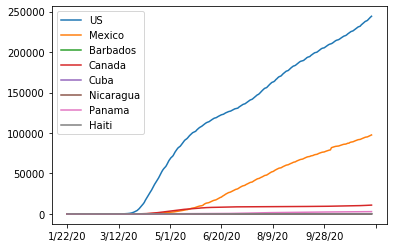

In [30]:
deaths_df_aggregated.loc ["US"].plot()
deaths_df_aggregated.loc ["Mexico"].plot()
deaths_df_aggregated.loc ["Barbados"].plot()
deaths_df_aggregated.loc ["Canada"].plot()
deaths_df_aggregated.loc ["Cuba"].plot()
deaths_df_aggregated.loc ["Nicaragua"].plot()
deaths_df_aggregated.loc ["Panama"].plot()
deaths_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/deaths-northamerica.png')
plt.show()

### Visualizing South America confirmed cases

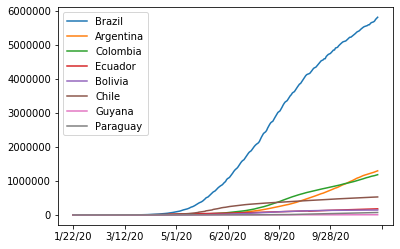

In [31]:
confirmed_df_aggregated.loc ["Brazil"].plot()
confirmed_df_aggregated.loc ["Argentina"].plot()
confirmed_df_aggregated.loc ["Colombia"].plot()
confirmed_df_aggregated.loc ["Ecuador"].plot()
confirmed_df_aggregated.loc ["Bolivia"].plot()
confirmed_df_aggregated.loc ["Chile"].plot()
confirmed_df_aggregated.loc ["Guyana"].plot()
confirmed_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/confirmed-southamerica.png')
plt.show()

### Visualizing South America recoveries cases

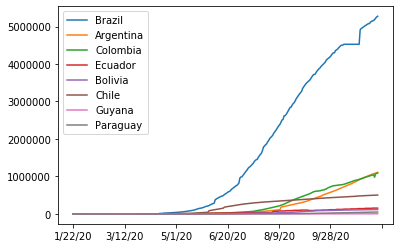

In [32]:
recoveries_df_aggregated.loc ["Brazil"].plot()
recoveries_df_aggregated.loc ["Argentina"].plot()
recoveries_df_aggregated.loc ["Colombia"].plot()
recoveries_df_aggregated.loc ["Ecuador"].plot()
recoveries_df_aggregated.loc ["Bolivia"].plot()
recoveries_df_aggregated.loc ["Chile"].plot()
recoveries_df_aggregated.loc ["Guyana"].plot()
recoveries_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/recoveries-southamerica.png')
plt.show()

### Visualizing South America deaths cases

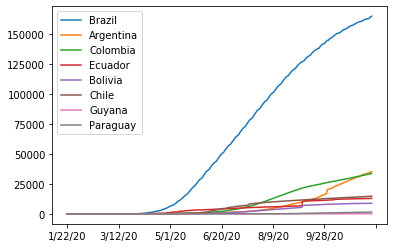

In [33]:
deaths_df_aggregated.loc ["Brazil"].plot()
deaths_df_aggregated.loc ["Argentina"].plot()
deaths_df_aggregated.loc ["Colombia"].plot()
deaths_df_aggregated.loc ["Ecuador"].plot()
deaths_df_aggregated.loc ["Bolivia"].plot()
deaths_df_aggregated.loc ["Chile"].plot()
deaths_df_aggregated.loc ["Guyana"].plot()
deaths_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/deaths-southamerica.png')
plt.show()

### Visualizing Oceania confirmed cases

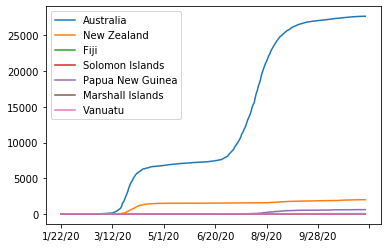

In [34]:
confirmed_df_aggregated.loc ["Australia"].plot()
confirmed_df_aggregated.loc ["New Zealand"].plot()
confirmed_df_aggregated.loc ["Fiji"].plot()
confirmed_df_aggregated.loc ["Solomon Islands"].plot()
confirmed_df_aggregated.loc ["Papua New Guinea"].plot()
confirmed_df_aggregated.loc ["Marshall Islands"].plot()
confirmed_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/confirmed-oceania.png')
plt.show()

### Visualizing Oceania recoveries cases

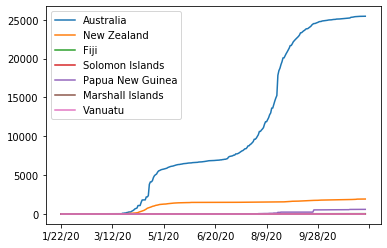

In [35]:
recoveries_df_aggregated.loc ["Australia"].plot()
recoveries_df_aggregated.loc ["New Zealand"].plot()
recoveries_df_aggregated.loc ["Fiji"].plot()
recoveries_df_aggregated.loc ["Solomon Islands"].plot()
recoveries_df_aggregated.loc ["Papua New Guinea"].plot()
recoveries_df_aggregated.loc ["Marshall Islands"].plot()
recoveries_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/recoveries-oceania.png')
plt.show()

### Visualizing Oceania deaths cases

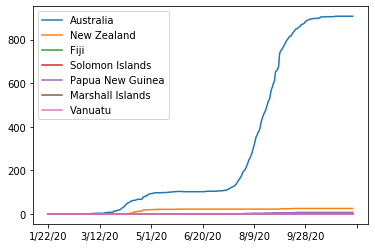

In [36]:
deaths_df_aggregated.loc ["Australia"].plot()
deaths_df_aggregated.loc ["New Zealand"].plot()
deaths_df_aggregated.loc ["Fiji"].plot()
deaths_df_aggregated.loc ["Solomon Islands"].plot()
deaths_df_aggregated.loc ["Papua New Guinea"].plot()
deaths_df_aggregated.loc ["Marshall Islands"].plot()
deaths_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/deaths-oceania.png')
plt.show()

### Calculating a good measure describing the spread of the virus 

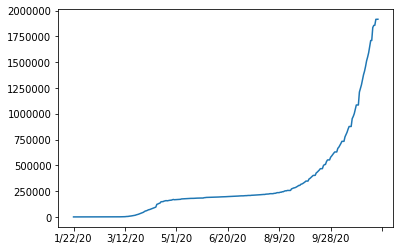

In [37]:
confirmed_df_aggregated.loc['France'].plot()

### Calculating the first derivative of the curve

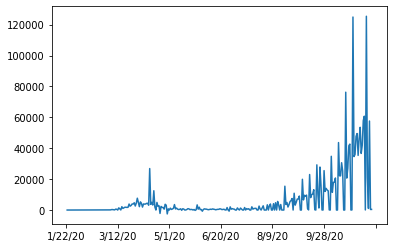

In [38]:
confirmed_df_aggregated.loc['France'].diff().plot()

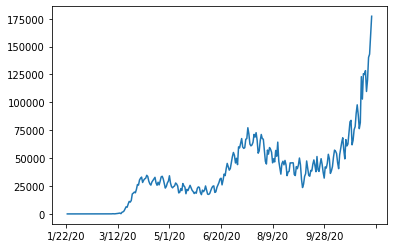

In [39]:
confirmed_df_aggregated.loc['US'].diff().plot()

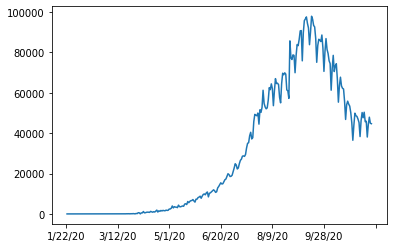

In [40]:
confirmed_df_aggregated.loc['India'].diff().plot()

### Find maximum infection rate for France

In [41]:
confirmed_df_aggregated.loc['France'].diff().max()

125414.0

### Find maximum infection rate for all countries. 

In [42]:
countries = list(confirmed_df_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(confirmed_df_aggregated.loc[c].diff().max())
confirmed_df_aggregated["max_infection_rate"] = max_infection_rates

In [43]:
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,41935,41975,42033,42092,42297,42463,42609,42795,42969,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,22721,23210,23705,24206,24731,25294,25801,26211,26701,563.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,60169,60800,61381,62051,62693,63446,64257,65108,65975,867.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,5135,5135,5319,5383,5437,5477,5567,5616,5725,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,12102,12223,12335,12433,12680,12816,12953,13053,13228,355.0


### Create a new dataframe with maximum infection rate

In [44]:
confirmed_data=pd.DataFrame(confirmed_df_aggregated["max_infection_rate"])

In [45]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=False).head()
max_infection

,max_infection_rate
Country/Region,
US,177224.0
France,125414.0
India,97894.0
Brazil,69074.0
Spain,55019.0


In [72]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=True).tail(20)

In [76]:
fig = px.bar(max_infection, x='max_infection_rate',y=max_infection.index,title='Countries with maximum infection rate', color='max_infection_rate', orientation='h')
fig.write_image("img/Countries-infection-rate.png", width=1960, height=1080)
fig.show()